In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)
def points_arand(num_points, min_p=-100, max_p=100):
    return np.random.uniform(min_p, max_p, size=(num_points, 2))

In [4]:

def points_bcircle(num_points, R=50, center=(0,0)):
    angles = np.random.uniform(0, 2 * np.pi, num_points)
    points_b = np.array([
        [center[0] + R * np.cos(angle), center[1] + R * np.sin(angle)]
        for angle in angles
    ])
    return points_b

In [5]:
def points_crect(num_points, vertices = [(-100, 100), (-100,-100), (100,-100), (100,100)]):

    random.seed(42)
    
    def random_point_on_rectangle():
        side = random.choice(['top', 'bottom', 'left', 'right'])
        if side == 'top':
            return np.array([random.uniform(-10, 10), 
                             max(vertices[i][1] for i in range(len(vertices)))])
        elif side == 'bottom':
            return np.array([random.uniform(-10, 10), 
                             min(vertices[i][1] for i in range(len(vertices)))])
        elif side == 'left':
            return np.array([min(vertices[i][0] for i in range(len(vertices))), 
                             random.uniform(-10, 10)])
        else:
            return np.array([max(vertices[i][0] for i in range(len(vertices))), 
                             random.uniform(-10, 10)])
    
    points_c = np.array([random_point_on_rectangle() for _ in range(num_points)])
    return points_c

In [6]:
def points_diagsq(num_points, vertices = [(0, 100), (0,0), (100,0), (100,100)]):

    points_on_axis = (num_points * 5) // 9
    points_on_diagonal = num_points - points_on_axis
    
    def random_point_on_axis_side(side):
        if side == 'bottom':
            return np.array([random.uniform(0, 10), 
                             min(vertices[i][1] for i in range(len(vertices)))])
        elif side == 'left':
            return np.array([min(vertices[i][0] for i in range(len(vertices))), 
                             random.uniform(0, 10)])
    
    def random_point_on_diagonal(diagonal):
        t = random.uniform(0, 1)
        if diagonal == 'main':
            return np.array([t * max(vertices[i][1] for i in range(len(vertices))), t * 10])
        elif diagonal == 'secondary':
            return np.array([t * max(vertices[i][1] for i in range(len(vertices))), 
                             max(vertices[i][1] for i in range(len(vertices)))
                             - t * max(vertices[i][1] for i in range(len(vertices)))])
    
    points_d = []
    points_d += [random_point_on_axis_side('bottom') for _ in range(points_on_axis)]
    points_d += [random_point_on_axis_side('left') for _ in range(points_on_axis)]
    points_d += [random_point_on_diagonal('main') for _ in range(points_on_diagonal)]
    points_d += [random_point_on_diagonal('secondary') for _ in range(points_on_diagonal)]
    points_d += vertices
    points_d = np.array(points_d)
    return points_d

In [7]:
points_a = np.float64(points_arand(100, -100.0, 100.0,))
points_b = np.float64(points_bcircle(100, 10, (0, 0)))
points_c = np.float64(points_crect(100, [(-10, 10), (-10,-10), (10,-10), (10,10)]))
points_d = np.float64(points_diagsq(45, [(0, 0), (10, 0), (10, 10), (0, 10)]))

In [8]:
def plot_points(points_list, labels, title):
    num_plots = len(points_list)
    num_cols = 2
    num_rows = (num_plots + num_cols - 1) // num_cols
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(6 * num_cols, 6 * num_rows))
    
    axes = axes.flatten() if num_rows > 1 else [axes]
    
    for i, (points, label) in enumerate(zip(points_list, labels)):
        axes[i].scatter(points[:, 0], points[:, 1], s=10, c='blue', label=label)
        axes[i].set_title(label)
        axes[i].set_xlabel('X')
        axes[i].set_ylabel('Y')
        axes[i].legend()
    
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[j])
    
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout
    plt.show()

In [9]:
labels = ['Punkty A', 'Punkty B', 'Punkty C', 'Punkty D']
points_list = [points_a, points_b, points_c, points_d]

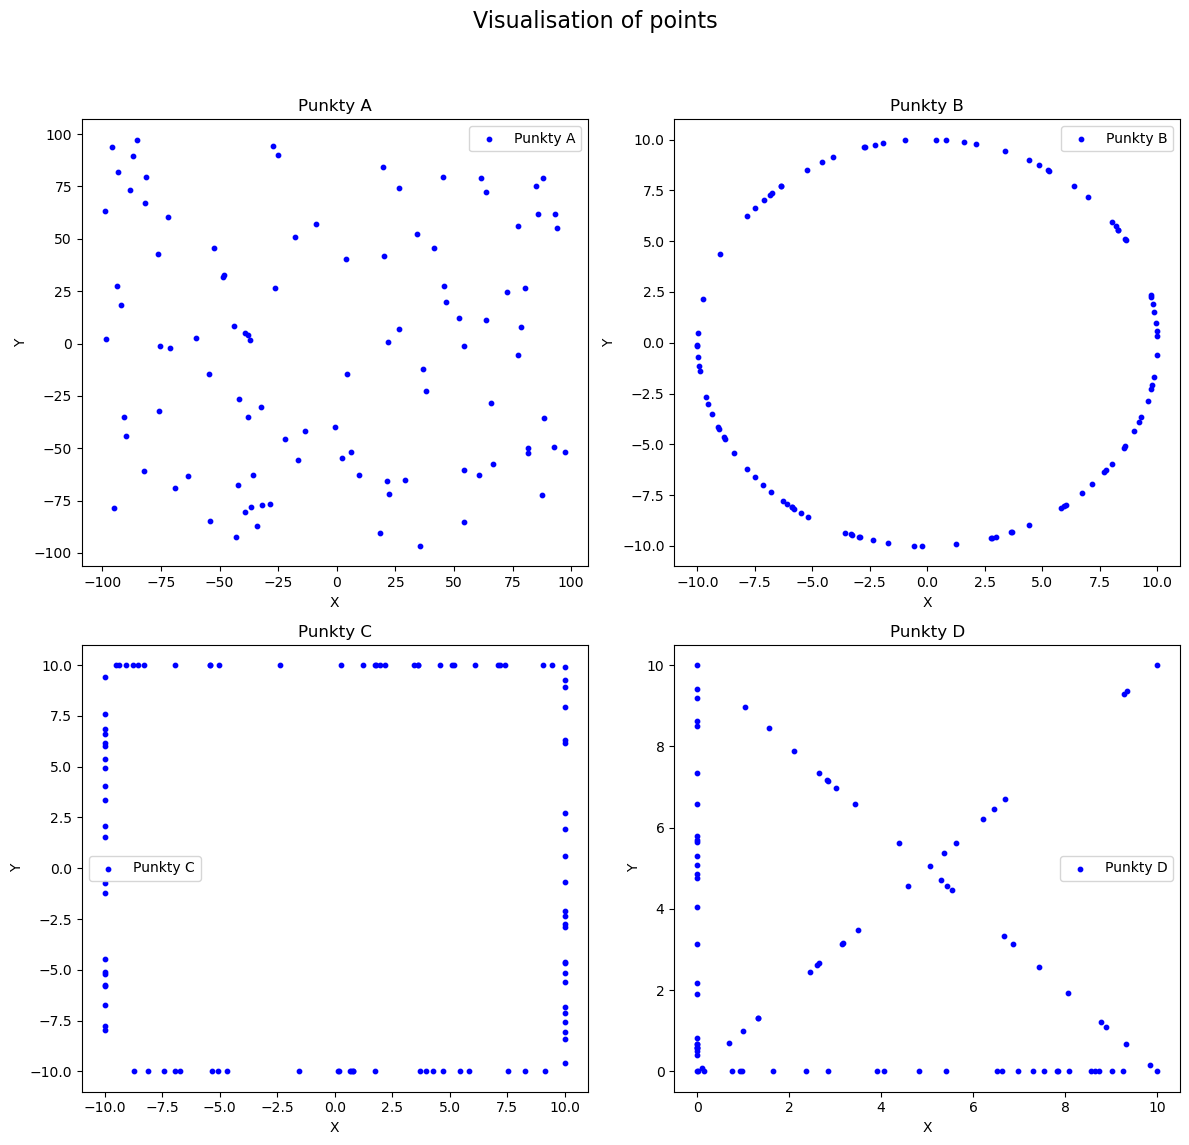

In [10]:
plot_points(points_list, labels, title='Visualisation of points')

In [38]:
def angle(point_a, point_b):
    x_a, y_a = point_a
    x_b, y_b = point_b
    angle = np.arctan2(y_b - y_a, x_b - x_a)
    if angle < 0:
        angle += 2 * np.pi
    return np.degrees(angle)

def dist(point_a, point_b):
    return ((point_a[0]-point_b[0]) ** 2 + (point_a[1]-point_b[1]) ** 2) ** 0.5

def is_on_left(point_a, point_t_1, point_t):
    mat = np.array([np.hstack((point_t_1, 1)), 
                    np.hstack((point_t, 1)), 
                    np.hstack((point_a, 1))])
    if np.linalg.det(mat) > 0:
        return True
    return False

def graham_alg(points):
    sa_points = []
    min_point = np.float64([float('inf'), float('inf')])
    for point in points:
        if point[1] < min_point[1]:
            min_point = point
        elif point[1] == min_point[1] and point[0] < min_point[0]:
            min_point = point
    for point in points:
        if point == min_point:
            continue
        sa_points.append((point, angle(min_point, point), dist(min_point, point)))
    sa_points.sort(key= lambda x: (x[1], x[2]))
    chk_points = []
    for i in range(len(sa_points)-1):
        if sa_points[i][1] != sa_points[i+1][1]:
            chk_points.append(sa_points[i][0])
    if len(sa_points) > 0 and sa_points[-1][1] != 0:
        chk_points.append(sa_points[-1][0])
    
    
    s = []
    s.append(min_point)
    if len(chk_points) > 0:
        s.append(chk_points[0])
    if len(chk_points) > 1:
        s.append(chk_points[1])
    
    i = 2
    while i < len(chk_points):
        if is_on_left(chk_points[i], s[-2], s[-1]):
            s.append(chk_points[i])
            i += 1
        else:
            s.pop()
    return s

In [39]:
def jarvis_alg(points):
    
    def dist_j(a,b, start):
        return (a[0]-start[0])**2+(a[1]-start[1])**2-(b[0]-start[0])**2-(b[1]-start[1])**2

    def orient(a, b, c):
        det = (a[0]-c[0]) * (b[1]-c[1]) - (b[0]-c[0]) * (a[1]-c[1])
        return det if det else dist_j(b,c,a)
    
    min_point = np.float64([float('inf'), float('inf')])
    idx = -1
    for i in range(len(points)):
        if points[i][1] < min_point[1]:
            min_point = points[i]
            idx = i
        elif points[i][1] == min_point[1] and points[i][0] < min_point[0]:
            min_point = points[i]
            idx = i
    n = len(points)
    s = []
    i = idx
    while True:
        s.append(points[i])
        k = (i+1) % n
        for j in range(n):
            if j == k:
                continue
            if orient(points[i], points[k], points[j]) < 0:
                k = j
        i = k
        if i == idx:
            break
    return s

# TESTY

Testy zostały skopiowane ze środowiska przygotowanego przez koło naukowe BIT. Pierwsze 4 testy to wg opisu testy poprawności, a więc dokładnie one poniżej są wykonane, najpierw dla algorytmu Grahama, następnie dla algorytmu Jarvisa.

In [40]:
import os

folder_path = 'testy'
def run_test(alg):
    test_files = sorted(os.listdir(folder_path)) 
    for i in range(1, len(test_files)//2 + 1):
        in_file = os.path.join(folder_path, f"test_2_1_{i}.in")
        out_file = os.path.join(folder_path, f"test_2_1_{i}.out")

        with open(in_file, 'r') as f:
            all_points = [
                (float(line.split()[0]), float(line.split()[1])) 
                for line in f.readlines()
            ]

        with open(out_file, 'r') as f:
            hull_points = [
                (float(line.split()[0]), float(line.split()[1])) 
                for line in f.readlines()
            ]

        ans = alg(all_points)

        if ans == hull_points:
            print(f"Test {i}: OK")
        else:
            print(f"Test {i}: WRONG")
            print("Expected:", hull_points)
            print("Got:", ans)

In [42]:
run_test(graham_alg)

Test 1: OK
Test 2: OK
Test 3: OK
Test 4: OK


In [43]:
run_test(jarvis_alg)

Test 1: OK
Test 2: OK
Test 3: OK
Test 4: OK


In [ ]:
def plot_results(points_list, fn, labels, title):
    num_plots = len(points_list)
    num_cols = 2
    num_rows = (num_plots + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(6 * num_cols, 6 * num_rows))
    axes = axes.flatten() if num_rows > 1 else [axes]
    for i, (points, label) in enumerate(zip(points_list, labels)):
        axes[i].scatter(points[:, 0], points[:, 1], s=5, c='blue', label=label)
        s = fn(points)
        print(s)
        s.append(s[0])
        x_s, y_s = zip(*s)
        axes[i].plot(x_s, y_s, 'ro-', label='Otoczka')
        axes[i].set_title(label)
        axes[i].set_xlabel('X')
        axes[i].set_ylabel('Y')
        axes[i].legend()
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout
    plt.show()

In [ ]:
points_list = [points_a, points_b, points_c, points_d]
labels = ['Punkty A', 'Punkty B', 'Punkty C', 'Punkty D']

In [ ]:
plot_results(points_list, graham_alg, labels, "Results of Graham algorithm")

In [ ]:
plot_results(points_list, jarvis_alg, labels, "Results of Jarvis algorithm")

In [ ]:
import pandas as pd
import time
def compare_time(generators_list, num_of_points, functions):
    point_sets = ['a', 'b', 'c', 'd']
    
    columns = pd.MultiIndex.from_product(
        [[fn.__name__ for fn in functions], point_sets],
        names=['Function', 'Set']
    )
    
    results = pd.DataFrame(index=num_of_points, columns=columns)

    for points_num in num_of_points:
        points_list = [generator(num_points=points_num) for generator in generators_list]
        
        for fn in functions:
            for i, points in enumerate(points_list):
                start_time = time.time()
                _ = fn(points)
                elapsed_time = time.time() - start_time
                
                results.loc[points_num, (fn.__name__, point_sets[i])] = elapsed_time

    return results

In [ ]:
generators_list = [points_arand, points_bcircle, points_crect, points_diagsq]
num_of_points = [500, 1000, 2000, 5000, 10000]
functions = [graham_alg, jarvis_alg]
df = compare_time(generators_list, num_of_points, functions)
df

In [ ]:
generators_list = [points_crect, points_diagsq, points_crect, points_diagsq]
num_of_points = [100000]
functions = [graham_alg, jarvis_alg]
df = compare_time(generators_list, num_of_points, functions)
df

In [ ]:
from matplotlib.animation import FuncAnimation, PillowWriter

def jarvis_visualization(points, name):
    def dist_j(a,b, start):
        return (a[0]-start[0])**2+(a[1]-start[1])**2-(b[0]-start[0])**2-(b[1]-start[1])**2

    def orient(a, b, c):
        det = (a[0]-c[0]) * (b[1]-c[1]) - (b[0]-c[0]) * (a[1]-c[1])
        return det if det else dist_j(b,c,a)
    
    min_point = np.float64([float('inf'), float('inf')])
    idx = -1
    for i in range(len(points)):
        if points[i][1] < min_point[1]:
            min_point = points[i]
            idx = i
        elif points[i][1] == min_point[1] and points[i][0] < min_point[0]:
            min_point = points[i]
            idx = i
    n = len(points)
    s = []
    s.append(points[idx])
    i = idx
    
    edges = []
    
    fig, ax = plt.subplots(figsize=(8, 8))
    minx = min(points[i][0] for i in range(len(points)))
    maxx = max(points[i][0] for i in range(len(points))) * 1.1
    miny = min(points[i][1] for i in range(len(points)))
    maxy = max(points[i][1] for i in range(len(points))) * 1.1
    
    minx *= (1.1 if minx<0 else 0.9)
    miny *= (1.1 if minx<0 else 0.9)
    
    if miny == 0:
        miny -= 1
    if minx == 0:
        minx -= 1
    
    ax.set_xlim(minx, maxx)
    ax.set_ylim(miny, maxy)

    ax.scatter(points[:, 0], points[:, 1], color='blue', label='Punkty wejściowe')
    
    frames = []
    
    while True:
        s.append(points[i])
        edges.append((s[-2], s[-1])) if len(s) > 1 else None
        k = (i+1) % n
        for j in range(n):
            if j == k:
                continue
            if orient(points[i], points[k], points[j]) < 0:
                k = j
                frames.append((list(s), list(edges), (s[-1], points[j]) if s else None, None))
        i = k
        
        frames.append((list(s), list(edges), None, edges[-1] if len(edges) > 0 else None))
        if i == idx:
            break
  
    def update(frame):
        ax.cla()
        ax.set_xlim(minx, maxx)
        ax.set_ylim(miny, maxy)
        
        ax.scatter(points[:, 0], points[:, 1], color='blue', label='Punkty wejściowe')
        
        hull_edges = frame[1]
        for i, edge in enumerate(hull_edges):
            ax.plot([edge[0][0], edge[1][0]], [edge[0][1], edge[1][1]], 'g-', label="Krawędzie otoczki" if i == 0 else "")

        if frame[2] is not None:
            current_edge = frame[2]
            ax.plot([current_edge[0][0], current_edge[1][0]], 
                    [current_edge[0][1], current_edge[1][1]], 'r--', label="Aktualnie rozpatrywana krawędź")

        hull_points = np.array(frame[0])
        ax.scatter(hull_points[:, 0], hull_points[:, 1], color='green', s=100, zorder=3, label="Wierzchołki otoczki")
        
        ax.legend()

    ani = FuncAnimation(fig, update, frames=frames, repeat=True, blit=False)

    # Zapis do GIF
    ani.save(f"jarvis_alg_{name}.gif", writer=PillowWriter(fps=2))

    plt.close()
    from IPython.display import Image
    return Image(filename=f"jarvis_alg_{name}.gif")

In [ ]:
jarvis_visualization(points_a, "a")
jarvis_visualization(points_b, "b")
jarvis_visualization(points_c, "c")
jarvis_visualization(points_d, "d")

In [ ]:
def graham_visualization(points, name):
    sa_points = []
    min_point = np.float64([float('inf'), float('inf')])
    for point in points:
        if point[1] < min_point[1]:
            min_point = point
        elif point[1] == min_point[1] and point[0] < min_point[0]:
            min_point = point
    for point in points:
        sa_points.append((point, angle(min_point, point), dist(min_point, point)))
    sa_points.sort(key= lambda x: (x[1], x[2]))
    chk_points = []
    for i in range(len(sa_points)-1):
        if sa_points[i][1] != sa_points[i+1][1]:
            chk_points.append(sa_points[i][0])
    if sa_points[-1][1] != 0:
        chk_points.append(sa_points[-1][0])
    
    fig, ax = plt.subplots(figsize=(8, 8))
    minx = min(points[i][0] for i in range(len(points)))
    maxx = max(points[i][0] for i in range(len(points))) * 1.1
    miny = min(points[i][1] for i in range(len(points)))
    maxy = max(points[i][1] for i in range(len(points))) * 1.1
    
    minx *= (1.1 if minx<0 else 0.8)
    miny *= (1.1 if minx<0 else 0.8)
    
    if miny == 0:
        miny -= 1
    if minx == 0:
        minx -= 1
    
    ax.set_xlim(minx, maxx)
    ax.set_ylim(miny, maxy)

    
    frames = []
    edges = []
    
    s = []
    s.append(min_point)
    s.append(chk_points[0])
    s.append(chk_points[1])
    
    i = 2
    while i < len(chk_points):
        if is_on_left(chk_points[i], s[-2], s[-1]):
            s.append(chk_points[i])
            i += 1
        else:
            s.pop()
        edges.append(s.copy())
        frames.append((chk_points[i] if i < len(chk_points) else None, edges[-1]))
    s.append(s[0])
    edges.append(s.copy())
    frames.append((chk_points[i] if i < len(chk_points) else None, []))
    
    def update(frame):
        ax.clear()
        ax.set_xlim(minx, maxx)
        ax.set_ylim(miny, maxy)
        
        ax.scatter(points[:, 0], points[:, 1], color='blue', label='Punkty')
        
        hull_points = frame[1]
        for j in range(1, len(hull_points)):
            ax.plot([hull_points[j - 1][0], hull_points[j][0]], 
                    [hull_points[j - 1][1], hull_points[j][1]], 'g-')
        
        if len(hull_points) > 1:
            ax.plot([hull_points[-2][0], hull_points[-1][0]], 
                    [hull_points[-2][1], hull_points[-1][1]], 'r--', label="Aktualna krawędź")
        
        ax.scatter([p[0] for p in hull_points], [p[1] for p in hull_points], color='green', s=50, label='Otoczka')
        
        current_point = frame[0]
        if current_point is not None:
            ax.scatter(current_point[0], current_point[1], color='orange', s=40, label="Rozważany punkt")

        ax.legend()

    ani = FuncAnimation(fig, update, frames=frames, repeat=False, blit=False)
    ani.save(f"graham_alg_{name}.gif", writer=PillowWriter(fps=2))
    plt.show()
    
    plt.close()
    from IPython.display import Image
    return Image(filename=f"graham_alg_{name}.gif")

In [ ]:
graham_visualization(points_a, "a")
graham_visualization(points_b, "b")
graham_visualization(points_c, "c")
graham_visualization(points_d, "d")